Data Exploration

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cirpy

%matplotlib inline

#Importing the RDKit packages
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

Units of each database:
ECOTOX - mg/L
TOXRIC - mg/kg
ADORE - mg/L and mol/L

However, as these values refer to water then I will assume a density of 1 kg/L => mg/kg = mg/L

Importing the first database from ECOTOX.

In [2]:
ecotox = pd.read_excel('Data/ECOTOX-Aquatic-Export_20231116_142805.xlsx')
ecotox.head()

/Users/aronalagaraj/miniconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CAS Number                                      Chemical Name  \
0       50282            (17beta)Estra-1,3,5(10)triene-3,17-diol   
1       50282            (17beta)Estra-1,3,5(10)triene-3,17-diol   
2       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
3       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
4       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   

                                      Chemical Grade Chemical Analysis  \
0                                                NaN        Unmeasured   
1                                                NaN        Unmeasured   
2                                                NaN        Unmeasured   
3  Technical grade, technical product, technical ...        Unmeasured   
4                                                NaN        Unmeasured   

  Chemical Purity Mean Op  Chemical Purity Mean(%)  Chemical Purity Min Op  \
0                     NaN                      NaN                     NaN   
1                     NaN                      NaN                     NaN   
2                     NaN                      NaN                     NaN   
3                     NaN                     99.0                     NaN   
4                     NaN                      NaN                     NaN   

   Chemical Purity Min(%)  Chemical Purity Max Op  Chemical Purity Max(%)  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

   ... BCF 3 Min Op BCF 3 Min BCF 3 Max Op BCF 3 Max BCF 3 Unit  \
0  ...          NaN       NaN          NaN       NaN        NaN   
1  ...          NaN       NaN          NaN       NaN        NaN   
2  ...          NaN       NaN          NaN       NaN        NaN   
3  ...          NaN       NaN          NaN       NaN        NaN   
4  ...          NaN       NaN          NaN       NaN        NaN   

                                              Author  Reference Number  \
0  Hirano,M., H. Ishibashi, N. Matsumura, Y. Naga...             94641   
1  Brennan,S.J., C.A. Brougham, J.J. Roche, and A...             84441   
2                                          Vilkas,A.             13007   
3                       Brausch,J.M., and P.N. Smith            117583   
4        Gaaboub,I.A., F.M. El-Gayar, and E.M. Helal             15291   

                                               Title  \
0  Acute Toxicity Responses of Two Crustaceans, A...   
1  Multi-Generational Effects of Four Selected En...   
2  Acute Toxicity of Diazinon Technical to the Wa...   
3  Development of Resistance to Cyfluthrin and Na...   
4  Comparative Bioassay Studies on Larvae of Cule...   

                               Source  Publication Year  
0         J. Health Sci.50(1): 97-100              2004  
1                 Chemosphere64:49-55              2006  
2  U.S.EPA-OPP Registration Standard:              1976  
3         Ecotoxicology18(5): 600-609              2009  
4    Bull. Entomol. Soc. Egypt9:77-84              1975  

[5 rows x 86 columns]

Keeping only the 48 hr results.

In [3]:
ecotox = ecotox.loc[ecotox['Observed Duration Mean (Days)'] == 2]
print("Number of datapoints in ECOTOX is %s." % len(ecotox))
ecotox.head()

Number of datapoints in ECOTOX is 441.


CAS Number                                      Chemical Name  \
0       50282            (17beta)Estra-1,3,5(10)triene-3,17-diol   
2       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
3       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
7       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   
8       50293  1,1'-(2,2,2-Trichloroethylidene)bis[4-chlorobe...   

                                      Chemical Grade Chemical Analysis  \
0                                                NaN        Unmeasured   
2                                                NaN        Unmeasured   
3  Technical grade, technical product, technical ...        Unmeasured   
7  Technical grade, technical product, technical ...        Unmeasured   
8                                                NaN        Unmeasured   

  Chemical Purity Mean Op  Chemical Purity Mean(%)  Chemical Purity Min Op  \
0                     NaN                      NaN                     NaN   
2                     NaN                      NaN                     NaN   
3                     NaN                     99.0                     NaN   
7                     NaN                     99.0                     NaN   
8                     NaN                      NaN                     NaN   

   Chemical Purity Min(%)  Chemical Purity Max Op  Chemical Purity Max(%)  \
0                     NaN                     NaN                     NaN   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
7                     NaN                     NaN                     NaN   
8                     NaN                     NaN                     NaN   

   ... BCF 3 Min Op BCF 3 Min BCF 3 Max Op BCF 3 Max BCF 3 Unit  \
0  ...          NaN       NaN          NaN       NaN        NaN   
2  ...          NaN       NaN          NaN       NaN        NaN   
3  ...          NaN       NaN          NaN       NaN        NaN   
7  ...          NaN       NaN          NaN       NaN        NaN   
8  ...          NaN       NaN          NaN       NaN        NaN   

                                              Author  Reference Number  \
0  Hirano,M., H. Ishibashi, N. Matsumura, Y. Naga...             94641   
2                                          Vilkas,A.             13007   
3                       Brausch,J.M., and P.N. Smith            117583   
7                       Brausch,J.M., and P.N. Smith            117583   
8   Ziegenfuss,P.S., W.J. Renaudette, and W.J. Adams              7884   

                                               Title  \
0  Acute Toxicity Responses of Two Crustaceans, A...   
2  Acute Toxicity of Diazinon Technical to the Wa...   
3  Development of Resistance to Cyfluthrin and Na...   
7  Development of Resistance to Cyfluthrin and Na...   
8  Methodology for Assessing the Acute Toxicity o...   

                               Source  Publication Year  
0         J. Health Sci.50(1): 97-100              2004  
2  U.S.EPA-OPP Registration Standard:              1976  
3         Ecotoxicology18(5): 600-609              2009  
7         Ecotoxicology18(5): 600-609              2009  
8     ASTM Spec. Tech. Publ.9:479-493              1986  

[5 rows x 86 columns]

Importing the second database from TOXRIC.

In [4]:
toxric = pd.read_csv('Data/TOXRIC_Ecotoxicity_LC50DM.csv')
print("Number of datapoints in TOXRIC is %s." % len(toxric))
toxric.head()

Number of datapoints in TOXRIC is 349.


TAID                Name  \
0   TOX-28       nitroglycerin   
1  TOX-475                 NaN   
2  TOX-593  diethylstilbestrol   
3  TOX-672           menadione   
4  TOX-877  PIPERONYL BUTOXIDE   

                                          IUPAC Name  PubChem CID  \
0                  1,3-dinitrooxypropan-2-yl nitrate         4510   
1               4-(2,4,4-trimethylpentan-2-yl)phenol         8814   
2     4-[(E)-4-(4-hydroxyphenyl)hex-3-en-3-yl]phenol       448537   
3                      2-methylnaphthalene-1,4-dione         4055   
4  5-[2-(2-butoxyethoxy)ethoxymethyl]-6-propyl-1,...         5794   

                               Canonical SMILES                     InChIKey  \
0  O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-]  SNIOPGDIGTZGOP-UHFFFAOYSA-N   
1                   CC(C)(C)CC(C)(C)c1ccc(O)cc1  ISAVYTVYFVQUDY-UHFFFAOYSA-N   
2           CC/C(=C(/CC)c1ccc(O)cc1)c1ccc(O)cc1  RGLYKWWBQGJZGM-ISLYRVAYSA-N   
3                        CC1=CC(=O)c2ccccc2C1=O  MJVAVZPDRWSRRC-UHFFFAOYSA-N   
4                CCCCOCCOCCOCc1cc2c(cc1CCC)OCO2  FIPWRIJSWJWJAI-UHFFFAOYSA-N   

   Toxicity Value  
0       32.003532  
1        0.090062  
2        1.144513  
3        0.490888  
4        1.731532

Checking if there are duplicate SMILES due to any errors as there aren't any duplicate molecules in this database.

In [5]:
toxric_dups = toxric[toxric.duplicated(subset=['Canonical SMILES'], keep=False)]
toxric_dups

TAID                           Name                     IUPAC Name  \
112   TOX-5078                            NaN        2-methylcyclohexan-1-ol   
136   TOX-5405                            NaN         N-ethylcyclohexanamine   
152   TOX-5618                            NaN        3-methylcyclohexan-1-ol   
166   TOX-5867  Cyclohexyl diphenyl phosphate  cyclohexyl diphenyl phosphate   
274  TOX-80987                       o-cresol                 2-methylphenol   
292  TOX-82893            TRIPHENYL PHOSPHATE            triphenyl phosphate   
295  TOX-83166                       m-cresol                 3-methylphenol   
300  TOX-83895                            NaN                 N-ethylaniline   

     PubChem CID                    Canonical SMILES  \
112        11418                          Cc1ccccc1O   
136        21609                         CCNc1ccccc1   
152        11566                        Cc1cccc(O)c1   
166      3034145  O=P(Oc1ccccc1)(Oc1ccccc1)Oc1ccccc1   
274          335                          Cc1ccccc1O   
292         8289  O=P(Oc1ccccc1)(Oc1ccccc1)Oc1ccccc1   
295          342                        Cc1cccc(O)c1   
300         7670                         CCNc1ccccc1   

                        InChIKey  Toxicity Value  
112  NDVWOBYBJYUSMF-UHFFFAOYSA-N       15.945130  
136  AGVKXDPPPSLISR-UHFFFAOYSA-N        0.441153  
152  HTSABYAWKQAHBT-UHFFFAOYSA-N       19.843948  
166  CPKKNIYMTSBFIQ-UHFFFAOYSA-N        1.017491  
274  QWVGKYWNOKOFNN-UHFFFAOYSA-N       15.100327  
292  XZZNDPSIHUTMOC-UHFFFAOYSA-N        0.999119  
295  RLSSMJSEOOYNOY-UHFFFAOYSA-N       18.792578  
300  OJGMBLNIHDZDGS-UHFFFAOYSA-N        0.420176

Correcting the SMILES in the database.

In [6]:
pd.options.mode.chained_assignment = None #Removes iteration warning

for i in toxric_dups['IUPAC Name']:
    correct_SMILES = cirpy.resolve(i, 'smiles') #Retrieves correct SMILES
    index = toxric[toxric['IUPAC Name']==i].index.values[0]
    toxric['Canonical SMILES'][index] = correct_SMILES

toxric_dups_check = toxric[toxric.duplicated(subset=['Canonical SMILES'], keep=False)]
toxric_dups_check

Empty DataFrame
Columns: [TAID, Name, IUPAC Name, PubChem CID, Canonical SMILES, InChIKey, Toxicity Value]
Index: []

Importing the third database, ADORE.

In [7]:
nature = pd.read_excel('Data/Nature_ADORE_LC50DM48.xlsx')
nature

test_id  reference_number   test_cas test_location test_exposure_type  \
0     1000108                34  7727-21-1           LAB                 NR   
1     1000115                34  7775-27-1           LAB                 NR   
2     1000121                34  7727-54-0           LAB                 NR   
3     1001516               212    64-17-5           LAB                  S   
4     1001534               212   108-90-7           LAB                  S   
...       ...               ...        ...           ...                ...   
2041  2292843             61942  7440-28-0           LAB                 NR   
2042  2292843             61942  7440-28-0           LAB                 NR   
2043  2292843             61942  7440-28-0           LAB                 NR   
2044  2292843             61942  7440-28-0           LAB                 NR   
2045  2292843             61942  7440-28-0           LAB                 NR   

     test_control_type test_media_type test_application_freq_unit  \
0                    I              FW                         NR   
1                    I              FW                         NR   
2                    I              FW                         NR   
3                    S              FW                          X   
4                    S              FW                          X   
...                ...             ...                        ...   
2041                 M              FW                         NR   
2042                 M              FW                         NR   
2043                 M              FW                         NR   
2044                 M              FW                         NR   
2045                 M              FW                         NR   

     test_organism_lifestage  result_id  ... tax_ps_ampkap tax_ps_amppm  \
0                         NR     125801  ...        0.5809         1200   
1                         NR     125808  ...        0.5809         1200   
2                         NR     125814  ...        0.5809         1200   
3                         NE     113300  ...        0.5809         1200   
4                         NE     113318  ...        0.5809         1200   
...                      ...        ...  ...           ...          ...   
2041                      NR    2683658  ...        0.5809         1200   
2042                      NR    2683657  ...        0.5809         1200   
2043                      NR    2683659  ...        0.5809         1200   
2044                      NR    2683660  ...        0.5809         1200   
2045                      NR    2683661  ...        0.5809         1200   

      tax_lh_amd tax_lh_lbcm tax_lh_lpcm  tax_lh_licm  tax_lh_ri#/d  \
0             45         0.1        0.25          NaN           NaN   
1             45         0.1        0.25          NaN           NaN   
2             45         0.1        0.25          NaN           NaN   
3             45         0.1        0.25          NaN           NaN   
4             45         0.1        0.25          NaN           NaN   
...          ...         ...         ...          ...           ...   
2041          45         0.1        0.25          NaN           NaN   
2042          45         0.1        0.25          NaN           NaN   
2043          45         0.1        0.25          NaN           NaN   
2044          45         0.1        0.25          NaN           NaN   
2045          45         0.1        0.25          NaN           NaN   

      result_conc1_mean_binary  result_conc1_mean_log  \
0                            0               1.963788   
1                            0               1.810233   
2                            0               2.004321   
3                            0               3.966048   
4                            0               1.491362   
...                        ...                    ...   
2041                         0               0.287802   
2042              

In [8]:
print(cirpy.resolve('7727-21-1','smiles'))
print(cirpy.resolve('7775-27-1','smiles'))
print(cirpy.resolve('52918-63-5','smiles'))
print(cirpy.resolve('52315-07-8','smiles'))
print(cirpy.resolve('7789-00-6','smiles'))
print(cirpy.resolve('174501-65-6','smiles'))
print(cirpy.resolve('55-86-7','smiles'))

[K+].[K+].[O-][S](=O)(=O)OO[S]([O-])(=O)=O
[Na+].[Na+].[O-][S](=O)(=O)OO[S]([O-])(=O)=O
CC1(C)[C@@H](C=C(Br)Br)[C@H]1C(=O)O[C@H](C#N)c2cccc(Oc3ccccc3)c2
CC1(C)C(C=C(Cl)Cl)C1C(=O)OC(C#N)c2cccc(Oc3ccccc3)c2
[K+].[K+].[O-][Cr]([O-])(=O)=O
None
[H+].[Cl-].CN(CCCl)CCCl


As shown above, some of the molecules are salts and some molecules are unable to have their SMILES retrieved, which means it can't be used for the dataset.
These will be removed.

In [9]:
# nature_filt = nature
# indices_to_drop = []
#
# for i in range(len(nature['test_cas'])):
#     cas_no = nature['test_cas'][i]
#     try:
#         smiles = cirpy.resolve(cas_no,'smiles')
#     except:
#         smiles = None
#     if smiles is None: #removes anything that doesn't have a SMILES
#         indices_to_drop.append(i)
#     elif '+' in smiles: #removes ions
#         indices_to_drop.append(i)
#     elif smiles[0] == '[' and smiles[-1] == ']': #removes pure metals
#         indices_to_drop.append(i)
#     elif smiles == 'O=[Pb]' or smiles == 'O=[Cd]' or smiles == 'S.[Pb]': #removes oxides found manually
#         indices_to_drop.append(i)
#
# nature_filt = nature_filt.drop(indices_to_drop)
# nature_filt

In [10]:
# nature_filt = nature_filt.reset_index(drop=True)
# nature_filt.to_csv('Data/Nature_ADORE_filtered.csv', sep=',', index=False, encoding='utf-8')
# nature_filt

Saving the above dataframe as a CSV as it took ~20 mins to calculate.

In [11]:
nature_filt = pd.read_csv('Data/Nature_ADORE_filtered.csv')
print("Number of datapoints in nature is %s." % len(nature_filt))
nature_filt.head()

Number of datapoints in nature is 1175.


test_id  reference_number  test_cas test_location test_exposure_type  \
0  1001516               212   64-17-5           LAB                  S   
1  1001534               212  108-90-7           LAB                  S   
2  1001552               212   67-66-3           LAB                  S   
3  1001571               212  106-48-9           LAB                  S   
4  1001589               212  108-95-2           LAB                  S   

  test_control_type test_media_type test_application_freq_unit  \
0                 S              FW                          X   
1                 S              FW                          X   
2                 S              FW                          X   
3                 S              FW                          X   
4                 S              FW                          X   

  test_organism_lifestage  result_id  ... tax_ps_ampkap tax_ps_amppm  \
0                      NE     113300  ...        0.5809         1200   
1                      NE     113318  ...        0.5809         1200   
2                      NE     113336  ...        0.5809         1200   
3                      NE     113355  ...        0.5809         1200   
4                      NE     113496  ...        0.5809         1200   

   tax_lh_amd tax_lh_lbcm tax_lh_lpcm  tax_lh_licm  tax_lh_ri#/d  \
0          45         0.1        0.25          NaN           NaN   
1          45         0.1        0.25          NaN           NaN   
2          45         0.1        0.25          NaN           NaN   
3          45         0.1        0.25          NaN           NaN   
4          45         0.1        0.25          NaN           NaN   

   result_conc1_mean_binary  result_conc1_mean_log result_conc1_mean_mol_log  
0                         0               3.966048                 -0.697361  
1                         0               1.491362                 -3.560022  
2                         0               2.547775                 -2.529120  
3                         0               0.778151                 -4.330955  
4                         0               1.113943                 -3.859706  

[5 rows x 46 columns]

Removing duplicates

In [12]:
import statistics

nature_dups = nature_filt[nature_filt.duplicated(subset=['test_cas'],keep=False)]
nature_dups_unique = nature_filt[nature_filt.duplicated(subset=['test_cas'],keep='first')].drop_duplicates(subset=['test_cas'],keep='first')

smiles_nature_dups = []
median_values_nature_dups = []

for i in nature_dups_unique['test_cas']:
    new_df = nature_dups.loc[nature_dups['test_cas'] == i]
    values = [j for j in new_df['result_conc1_mean']]

    smiles_nature_dups.append(cirpy.resolve(i,'smiles'))
    median_values_nature_dups.append(statistics.median(values))

In [13]:
nature_NOT_dups = nature_filt.drop_duplicates(subset=['test_cas'],keep=False)

smiles_nature_NOT_dups = [cirpy.resolve(nature_NOT_dups.iloc[i]['test_cas'],'smiles') for i in range(len(nature_NOT_dups['test_cas']))]
conc_values_nature_NOT_dups = [nature_NOT_dups.iloc[i]['result_conc1_mean'] for i in range(len(nature_NOT_dups['test_cas']))]

In [14]:
toxric_smiles = [toxric['Canonical SMILES'][i] for i in range(len(toxric['Canonical SMILES']))]
toxric_concs = [toxric['Toxicity Value'][i] for i in range(len(toxric['Canonical SMILES']))]

Combining the data from Nature and TOXRIC databases

In [15]:
all_smiles = smiles_nature_dups + smiles_nature_NOT_dups + toxric_smiles
all_concs = median_values_nature_dups + conc_values_nature_NOT_dups + toxric_concs

complete_data = pd.DataFrame(
    {'SMILES' : all_smiles,
     'LC50' : all_concs}
)

complete_data

SMILES       LC50
0                                                 ClCl   0.120000
1                                            Oc1ccccc1  13.300000
2                               CNC(=O)CS[P](=S)(OC)OC   1.650000
3                   CCO[P](=S)(OCC)Oc1cc(C)nc(n1)C(C)C   0.001000
4        ClC1=C(Cl)C2(Cl)C3CO[S](=O)OCC3C1(Cl)C2(Cl)Cl   0.328000
..                                                 ...        ...
779  C/C=C(\C)C(=O)OC1CC(OC(C)=O)C2(C(=O)OC)COC3C2C...   0.621948
780                                     Cc1ccc2sccc2c1  13.993811
781                        Clc1cc(Cl)c(-c2ccccc2)cc1Cl   0.589899
782                           CSc1nc(N)nc(NC(C)(C)C)n1  10.990340
783                              Clc1cccc(-c2ccccc2)c1   0.430186

[784 rows x 2 columns]

Now to remove any duplicates between the nature and toxric databases

In [16]:
complete_data = complete_data.drop_duplicates(subset='SMILES',keep='last')
complete_data.head()

SMILES   LC50
0                                           ClCl  0.120
2                         CNC(=O)CS[P](=S)(OC)OC  1.650
3             CCO[P](=S)(OCC)Oc1cc(C)nc(n1)C(C)C  0.001
4  ClC1=C(Cl)C2(Cl)C3CO[S](=O)OCC3C1(Cl)C2(Cl)Cl  0.328
6             CO[P](=S)(OC)SCN1C(=O)c2ccccc2C1=O  0.392

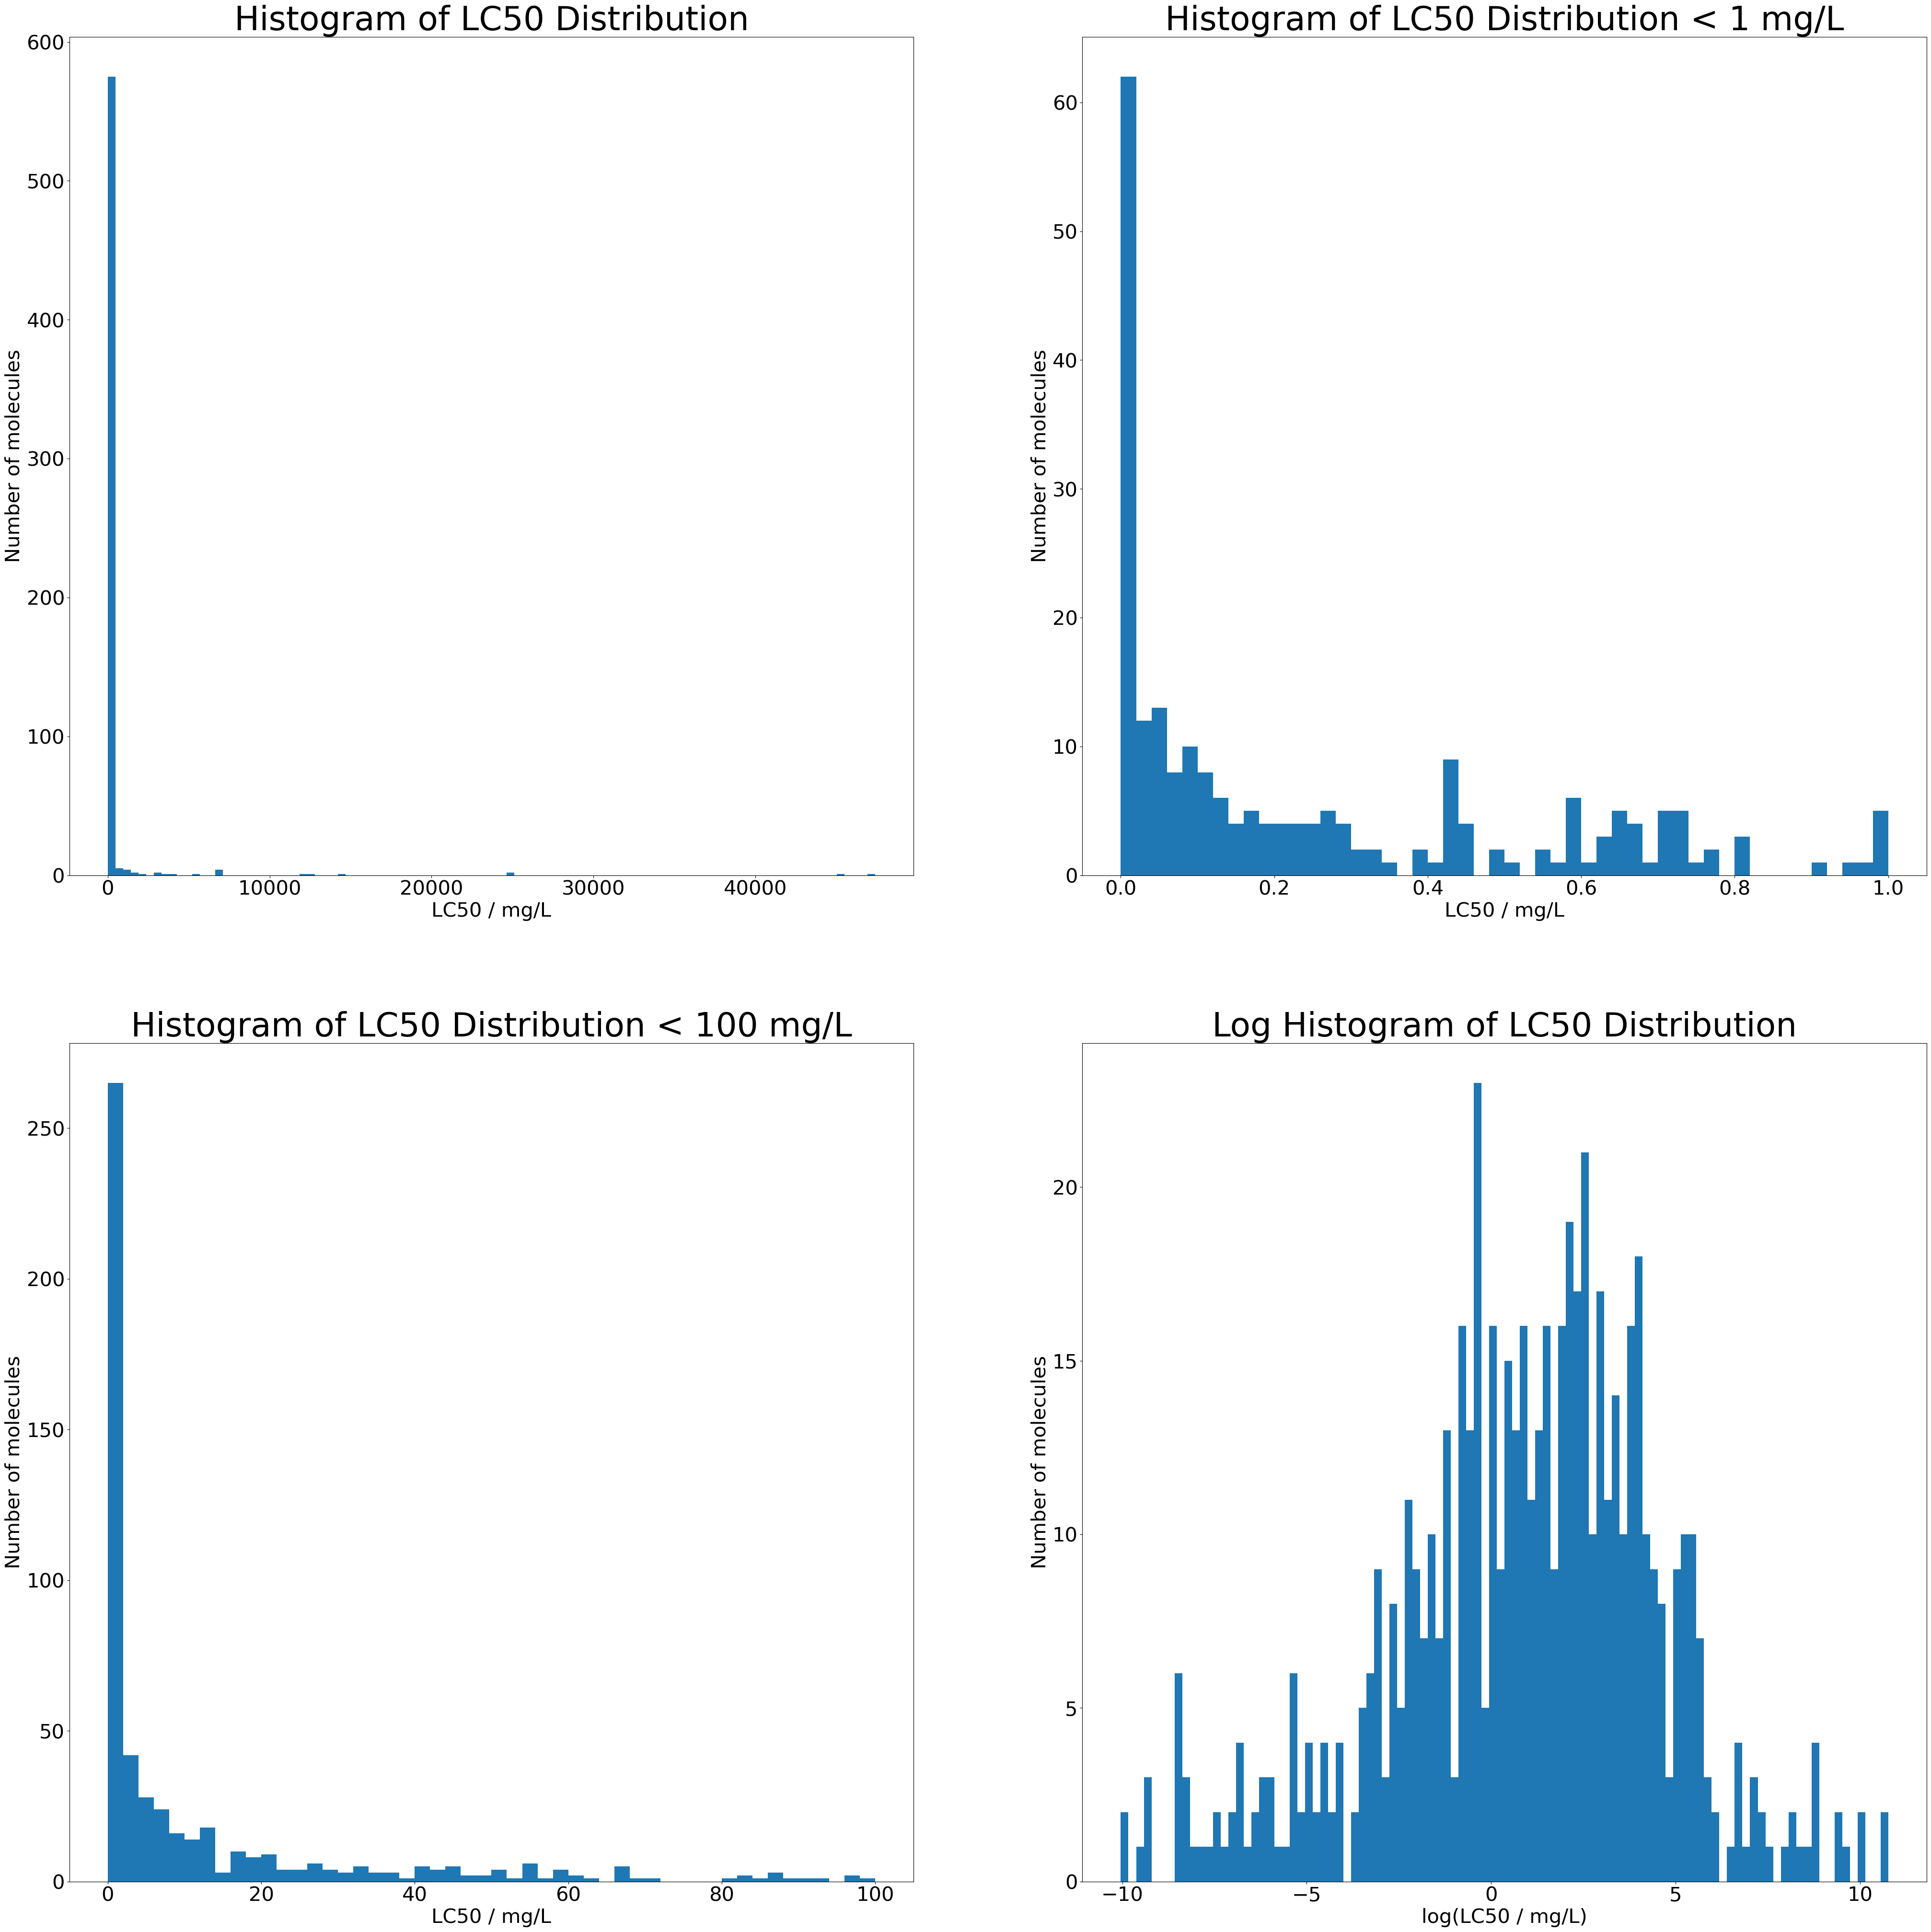

In [17]:
fig,axs = plt.subplots(2,2,figsize=(50,50))

axs[0,0].hist(complete_data['LC50'],bins=100)
axs[0,0].set_ylabel('Number of molecules', fontsize=30)
axs[0,0].set_xlabel('LC50 / mg/L', fontsize=30)
axs[0,0].set_title('Histogram of LC50 Distribution', fontsize=50)
axs[0,0].tick_params(axis='both', which='major', labelsize=30)

subset = [i for i in complete_data['LC50'] if i <= 100]
axs[1,0].hist(subset,bins=50)
axs[1,0].set_ylabel('Number of molecules', fontsize=30)
axs[1,0].set_xlabel('LC50 / mg/L', fontsize=30)
axs[1,0].set_title('Histogram of LC50 Distribution < 100 mg/L', fontsize=50)
axs[1,0].tick_params(axis='both', which='major', labelsize=30)

subset2 = [i for i in complete_data['LC50'] if i <= 1]
axs[0,1].hist(subset2,bins=50)
axs[0,1].set_ylabel('Number of molecules', fontsize=30)
axs[0,1].set_xlabel('LC50 / mg/L', fontsize=30)
axs[0,1].set_title('Histogram of LC50 Distribution < 1 mg/L', fontsize=50)
axs[0,1].tick_params(axis='both', which='major', labelsize=30)

subset3 = np.log(complete_data['LC50'])
axs[1,1].hist(subset3,bins=100)
axs[1,1].set_ylabel('Number of molecules', fontsize=30)
axs[1,1].set_xlabel('log(LC50 / mg/L)', fontsize=30)
axs[1,1].set_title('Log Histogram of LC50 Distribution', fontsize=50)
axs[1,1].tick_params(axis='both', which='major', labelsize=30)

plt.show()

Number of datapoints in complete data is 601.


[15:51:44] SMILES Parse Error: syntax error while parsing: O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC
[15:51:44] SMILES Parse Error: Failed parsing SMILES 'O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC' for input: 'O(|[Sn](CCCC)(CCCC)CCCC)|[Sn](CCCC)(CCCC)CCCC'
[15:51:44] SMILES Parse Error: syntax error while parsing: CC[Pb](|[O]C(=O)C(C)=C)(CC)CC
[15:51:44] SMILES Parse Error: Failed parsing SMILES 'CC[Pb](|[O]C(=O)C(C)=C)(CC)CC' for input: 'CC[Pb](|[O]C(=O)C(C)=C)(CC)CC'


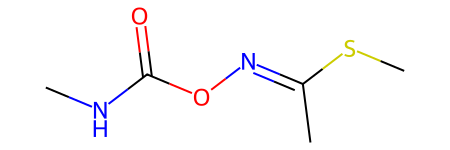

In [18]:
PandasTools.AddMoleculeColumnToFrame(complete_data,'SMILES','Structure')

complete_data.dropna(subset=['Structure'], inplace=True)
complete_data.to_csv('Data/complete_data.csv', sep=',', index=False, encoding='utf-8')
print("Number of datapoints in complete data is %s." % len(complete_data))

from random import randint
complete_data['Structure'][randint(0,len(complete_data))] #Example of one structure

In [19]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    Mol_descriptors = []

    for mol in mols:
        #Add hydrogens to molecules
        mol=Chem.AddHs(mol)
        #Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

Mol_descriptors,desc_names = RDkit_descriptors(complete_data['SMILES'])

[15:51:44] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-311/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[15:51:44] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-311/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAtoms()
****

[15:51:44] 

****
Pre-condition Violation
bad result vector size
Violation occurred on line 42 in file /Users/runner/work/rdkit-pypi/rdkit-pypi/build/temp.macosx-11.0-arm64-cpython-311/rdkit/Code/GraphMol/Descriptors/Crippen.cpp
Failed Expression: logpContribs.size() == mol.getNumAtoms() && mrContribs.size() == mol.getNumAto

In [20]:
dataset_with_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
dataset_with_descriptors.head()

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0           4.111111        4.111111           4.111111        4.111111   
1          11.782078       11.782078           0.410787       -4.494295   
2           8.217198        8.217198           1.419594       -5.502894   
3          11.785031       11.785031           0.648458       -3.394236   
4          12.725053       12.725053           0.107046       -4.591476   

        qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0  0.404263   3.000000   70.906          70.906   69.937705   
1  0.712117  30.333333  229.263         217.167  228.999622   
2  0.717616  33.578947  304.352         283.184  304.101050   
3  0.575409  69.894737  406.929         400.881  403.816881   
4  0.614195  26.210526  317.328         305.232  316.994536   

   NumValenceElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                   14  ...             0           0                  0   
1                   72  ...             0           0                  0   
2                  108  ...             0           0                  0   
3                  108  ...             0           0                  0   
4                  102  ...             0           0                  0   

   fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0             0            0            0             0                 0   
1             0            0            0             0                 0   
2             0            0            0             0                 0   
3             0            0            0             0                 0   
4             0            0            0             0                 0   

   fr_urea        SPS  
0        0   3.000000  
1        0  30.333333  
2        0  33.578947  
3        0  69.894737  
4        0  26.210526  

[5 rows x 211 columns]

In [21]:
dataset_with_descriptors = dataset_with_descriptors.dropna(axis=1)
dataset_with_descriptors.to_csv('Data/descriptors.csv', sep=',', index=False, encoding='utf-8')
dataset_with_descriptors

MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
0             4.111111        4.111111           4.111111        4.111111   
1            11.782078       11.782078           0.410787       -4.494295   
2             8.217198        8.217198           1.419594       -5.502894   
3            11.785031       11.785031           0.648458       -3.394236   
4            12.725053       12.725053           0.107046       -4.591476   
..                 ...             ...                ...             ...   
596          15.931675       15.931675           1.984516       -7.076048   
597           7.826782        7.826782           0.016551       -2.671901   
598           7.978953        7.978953           0.210123       -0.565676   
599           8.060211        8.060211           0.009568       -3.817037   
600           7.907842        7.907842           0.344444       -0.604256   

          qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  \
0    0.404263   3.000000   70.906          70.906   69.937705   
1    0.712117  30.333333  229.263         217.167  228.999622   
2    0.717616  33.578947  304.352         283.184  304.101050   
3    0.575409  69.894737  406.929         400.881  403.816881   
4    0.614195  26.210526  317.328         305.232  316.994536   
..        ...        ...      ...             ...         ...   
596  0.140161  85.725490  720.721         676.369  720.262935   
597  0.537843  23.200000  148.230         140.166  148.034671   
598  0.607063  16.866667  257.547         250.491  255.961333   
599  0.722827  30.428571  213.310         198.190  213.104816   
600  0.634617  19.615385  188.657         179.585  188.039278   

     NumValenceElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                     14  ...             0           0                  0   
1                     72  ...             0           0                  0   
2                    108  ...             0           0                  0   
3                    108  ...             0           0                  0   
4                    102  ...             0           0                  0   
..                   ...  ...           ...         ...                ...   
596                  280  ...             0           0                  0   
597                   50  ...             0           0                  0   
598                   76  ...             0           0                  0   
599                   78  ...             0           0                  0   
600                   64  ...             0           0                  0   

     fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0               0            0            0             0                 0   
1               0            0            0             0                 0   
2               0            0            0             0                 0   
3               0            0            0             0                 0   
4               0            0            0             0                 0   
..            ...          ...          ...           ...               ...   
596             0            0            0             0                 0   
597             0            0            0             1                 0   
598             0            0            0             0                 0   
599             0            0            0             0                 0   
600             0            0            0             0                 0   

     fr_urea        SPS  
0          0   3.000000  
1          0  30.333333  
2          0  33.578947  
3          0  69.894737  
4          0  26.210526  
..       ...        ...  
596        0  85.725490  
597        0  23.200000  
598        0  16.866667  
599        0  30.428571  
600        0  19.615385  

[601 rows x 199 columns]

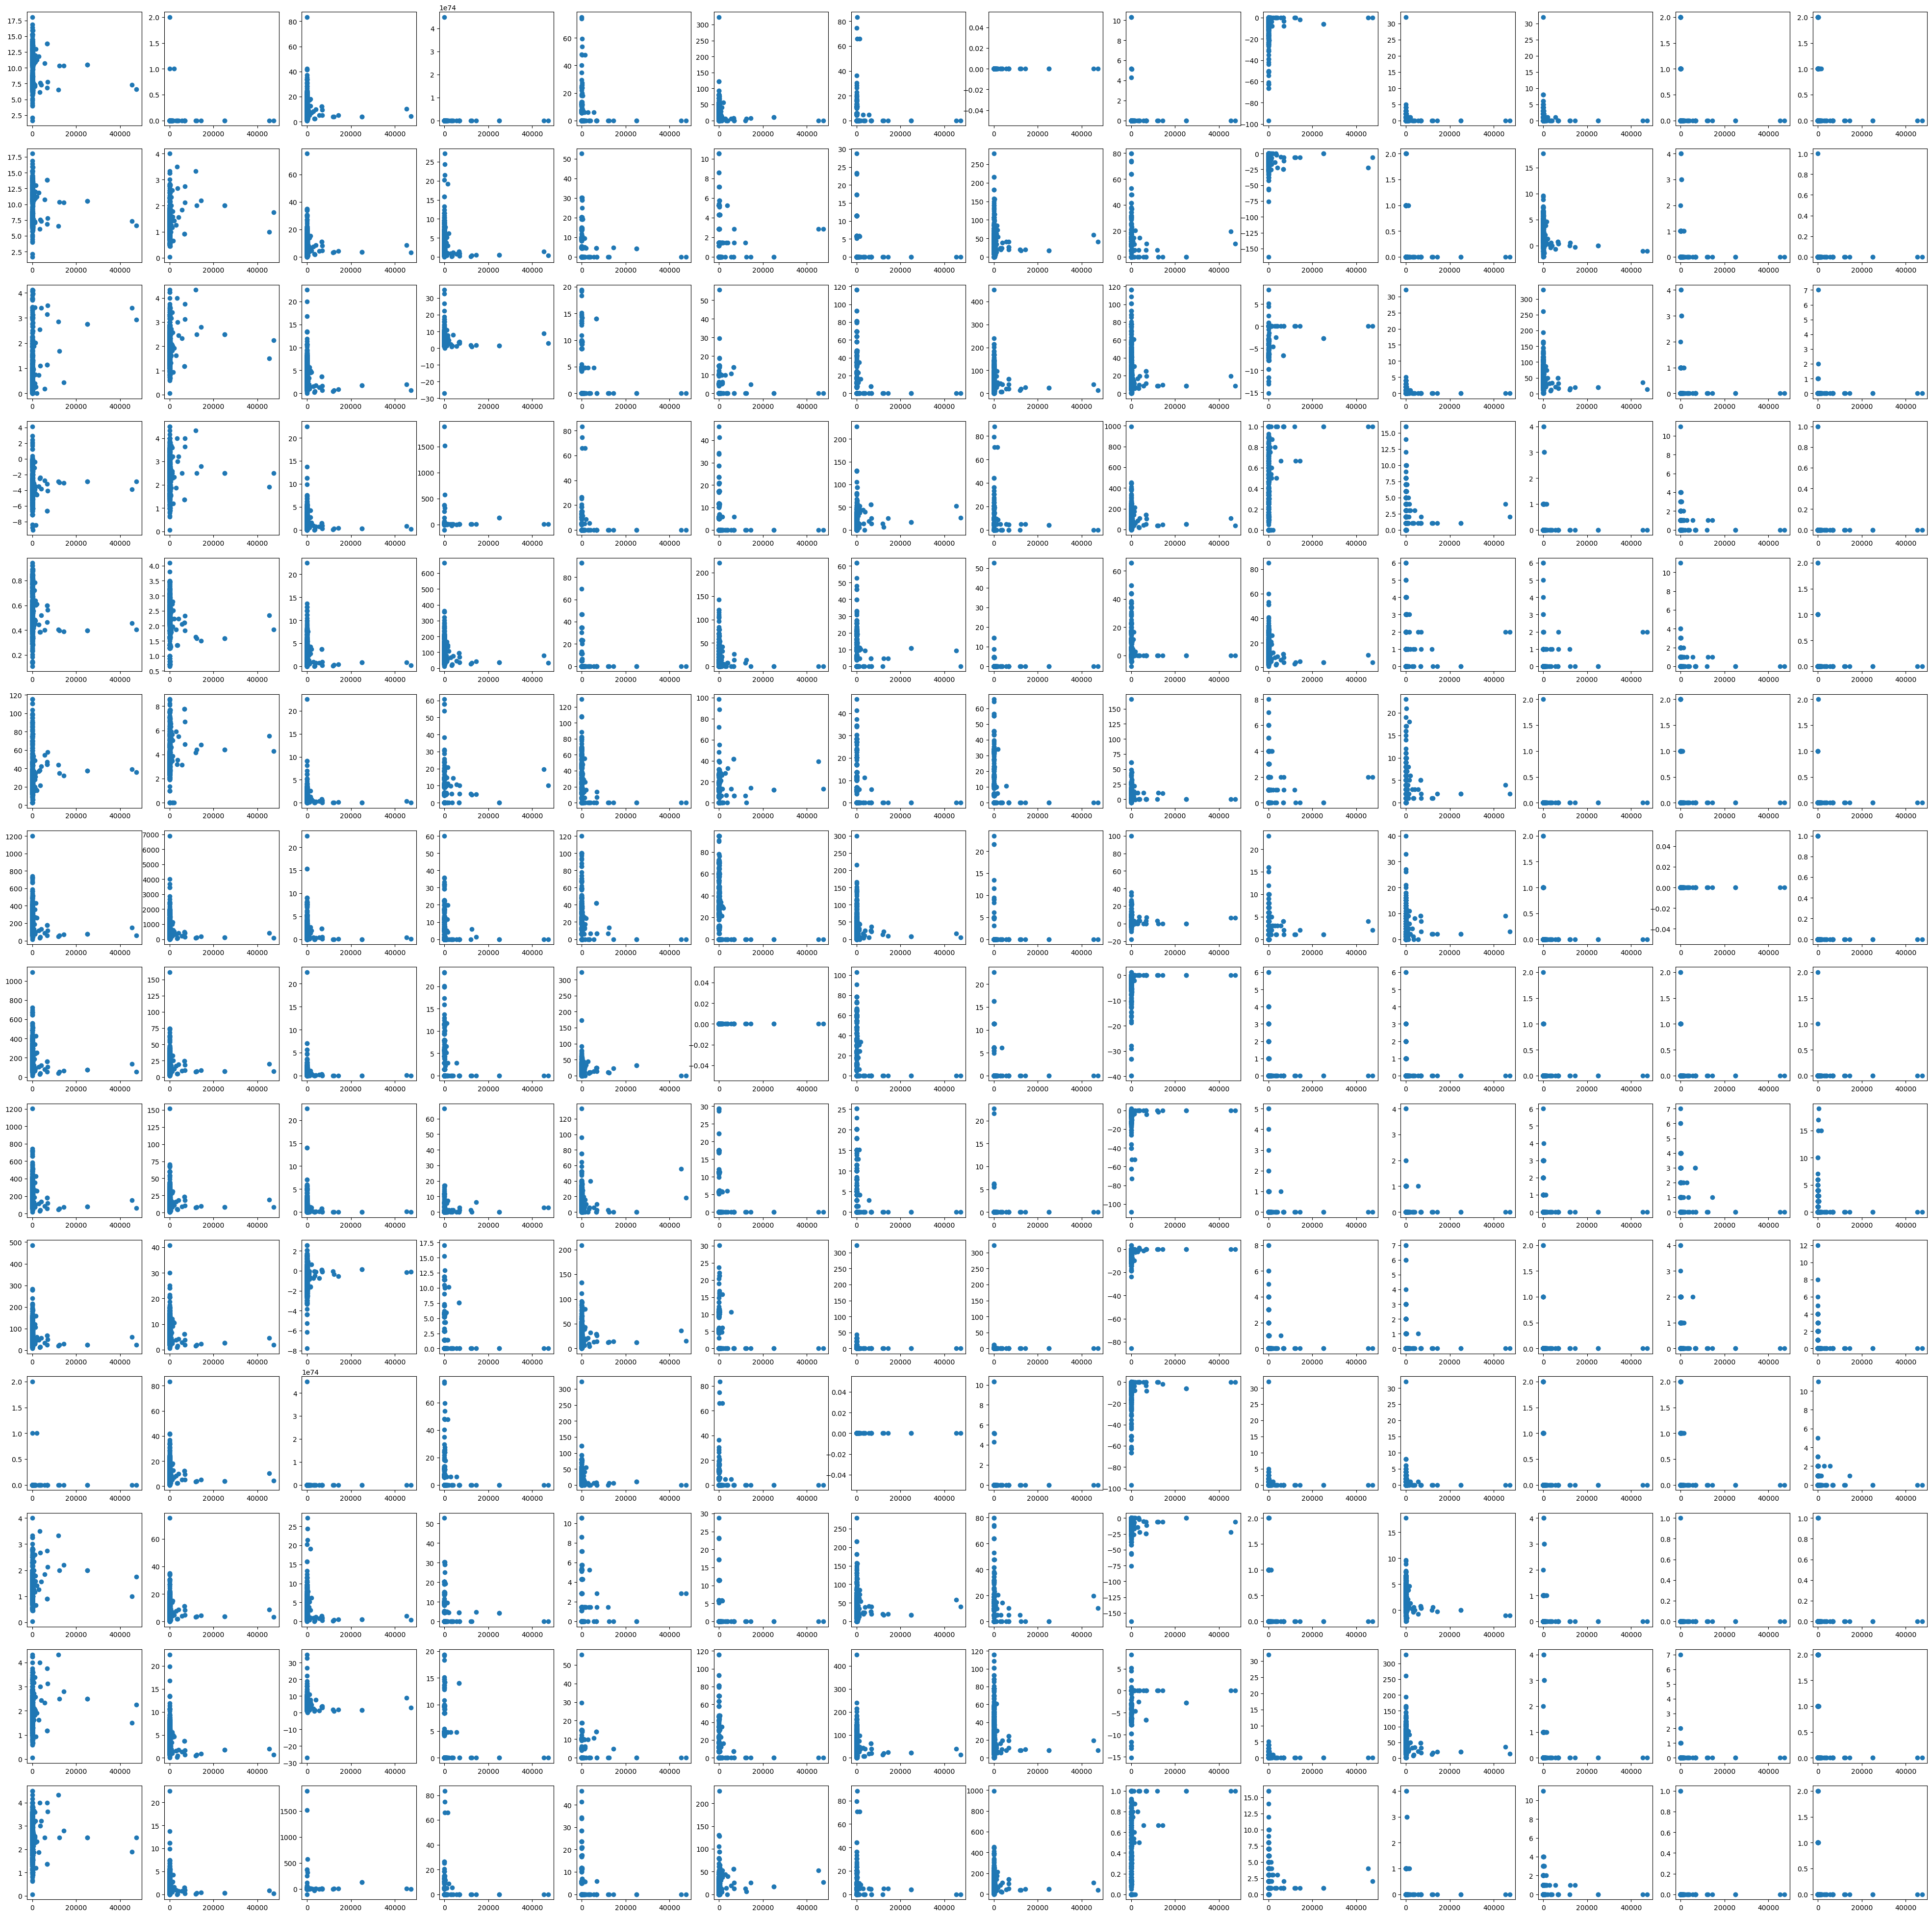

In [22]:
LC50 = complete_data['LC50'].to_numpy()
x1, y1 = 14,14
fig,axs = plt.subplots(x1,y1,figsize=(50,50))

for i in range(y1):
    for j in range(x1):
        y = dataset_with_descriptors[dataset_with_descriptors.columns[10*i+j]].to_numpy()
        try:
            if y.shape[1] >= 2:
                y = y[:,0]
        except:
            pass
        axs[j,i].scatter(LC50,y)

plt.show()

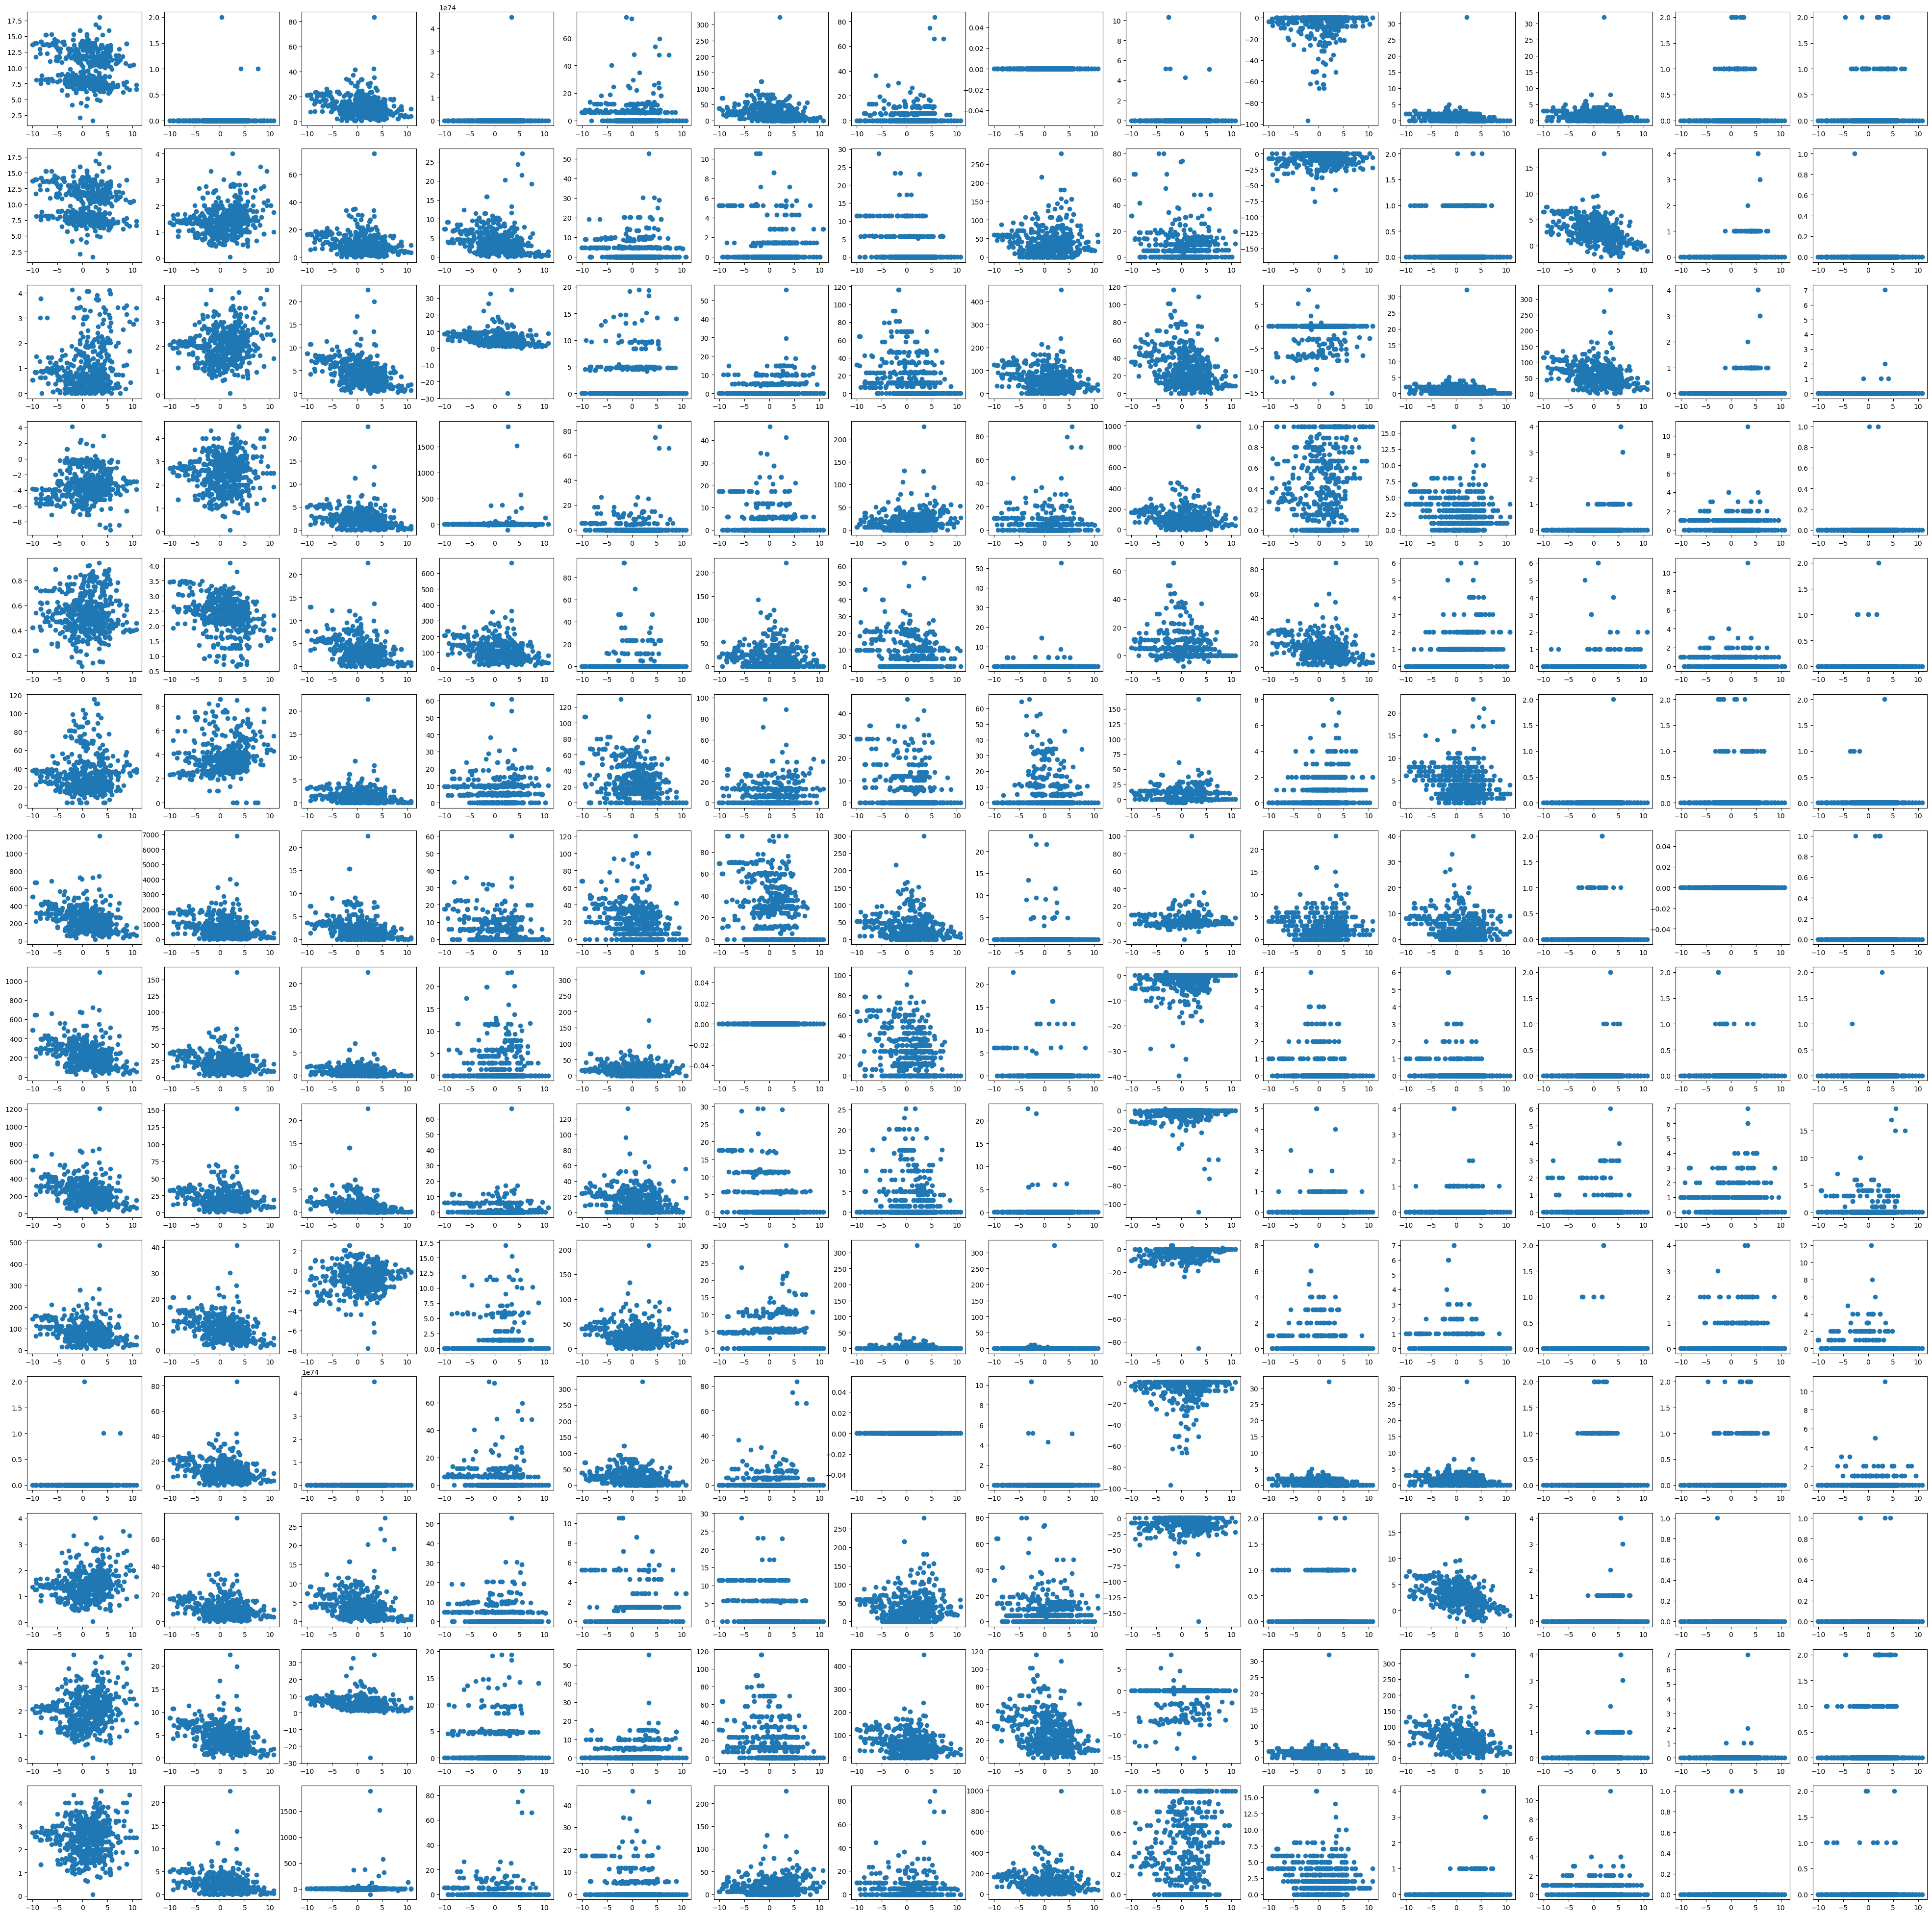

In [23]:
LC50 = np.log(complete_data['LC50'].to_numpy())
x1, y1 = 14,14
fig,axs = plt.subplots(x1,y1,figsize=(50,50))

for i in range(y1):
    for j in range(x1):
        y = dataset_with_descriptors[dataset_with_descriptors.columns[10*i+j]].to_numpy()
        try:
            if y.shape[1] >= 2:
                y = y[:,0]
        except:
            pass
        axs[j,i].scatter(LC50,y)

plt.show()

Looking at the classification distribution.

Using a 4-class:
    Acute 1: <= 1 mg/L
    Acute 2: >1 and <= 10 mg/L
    Acute 3: >10 and <= 100 mg/L
    Non-toxic: >100 mg/L

Let 0 = Non-toxic, 1 = Acute 3, 2 = Acute 2, 3 = Acute 1

In [24]:
toxic_classes_4 = []

for i in complete_data['LC50']:
    if i <= 1:
        toxic_classes_4.append(3)
    elif i <= 10:
        toxic_classes_4.append(2)
    elif i <= 100:
        toxic_classes_4.append(1)
    else:
        toxic_classes_4.append(0)

complete_data['4-Class'] = toxic_classes_4
complete_data.head()

SMILES   LC50  \
0                                           ClCl  0.120   
2                         CNC(=O)CS[P](=S)(OC)OC  1.650   
3             CCO[P](=S)(OCC)Oc1cc(C)nc(n1)C(C)C  0.001   
4  ClC1=C(Cl)C2(Cl)C3CO[S](=O)OCC3C1(Cl)C2(Cl)Cl  0.328   
6             CO[P](=S)(OC)SCN1C(=O)c2ccccc2C1=O  0.392   

                                       Structure  4-Class  
0  <rdkit.Chem.rdchem.Mol object at 0x1784fb680>        3  
2  <rdkit.Chem.rdchem.Mol object at 0x1784fb610>        2  
3  <rdkit.Chem.rdchem.Mol object at 0x1784fb6f0>        3  
4  <rdkit.Chem.rdchem.Mol object at 0x1784fb840>        3  
6  <rdkit.Chem.rdchem.Mol object at 0x1784fb8b0>        3

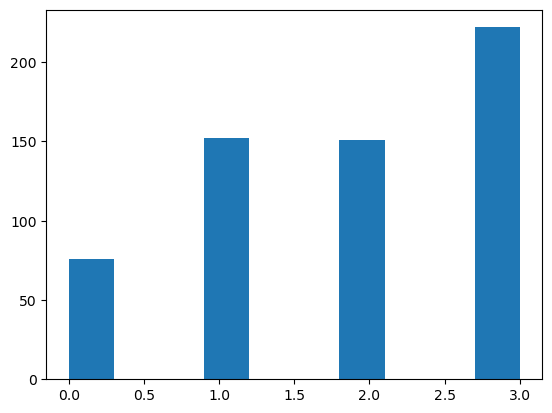

In [25]:
plt.hist(complete_data['4-Class'])
plt.show()

Using a 3-class:
    Acute 1: <= 1 mg/L
    Acute 2: >1 and <= 10 mg/L
    Non-toxic: >10 mg/L

Let -1 = Non-toxic, 0 = Acute 2, 1 = Acute 1

In [26]:
toxic_classes_3 = []

for i in complete_data['LC50']:
    if i <= 1:
        toxic_classes_3.append(1)
    elif i <= 10:
        toxic_classes_3.append(0)
    else:
        toxic_classes_3.append(-1)

complete_data['3-Class'] = toxic_classes_3
complete_data.head()

SMILES   LC50  \
0                                           ClCl  0.120   
2                         CNC(=O)CS[P](=S)(OC)OC  1.650   
3             CCO[P](=S)(OCC)Oc1cc(C)nc(n1)C(C)C  0.001   
4  ClC1=C(Cl)C2(Cl)C3CO[S](=O)OCC3C1(Cl)C2(Cl)Cl  0.328   
6             CO[P](=S)(OC)SCN1C(=O)c2ccccc2C1=O  0.392   

                                       Structure  4-Class  3-Class  
0  <rdkit.Chem.rdchem.Mol object at 0x1784fb680>        3        1  
2  <rdkit.Chem.rdchem.Mol object at 0x1784fb610>        2        0  
3  <rdkit.Chem.rdchem.Mol object at 0x1784fb6f0>        3        1  
4  <rdkit.Chem.rdchem.Mol object at 0x1784fb840>        3        1  
6  <rdkit.Chem.rdchem.Mol object at 0x1784fb8b0>        3        1

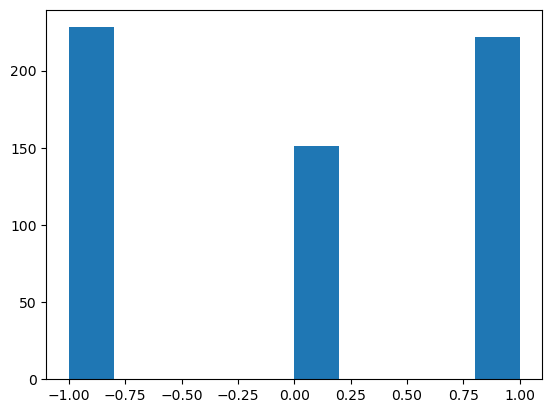

In [27]:
plt.hist(complete_data['3-Class'])
plt.show()

Using a 2-class:
    Toxic: <= 10 mg/L
    Non-toxic: >10 mg/L

Let -1 = Non-toxic, 1 = Toxic

In [28]:
toxic_classes_2 = []

for i in complete_data['LC50']:
    if i <= 10:
        toxic_classes_2.append(1)
    else:
        toxic_classes_2.append(-1)

complete_data['2-Class'] = toxic_classes_2
complete_data.head()

SMILES   LC50  \
0                                           ClCl  0.120   
2                         CNC(=O)CS[P](=S)(OC)OC  1.650   
3             CCO[P](=S)(OCC)Oc1cc(C)nc(n1)C(C)C  0.001   
4  ClC1=C(Cl)C2(Cl)C3CO[S](=O)OCC3C1(Cl)C2(Cl)Cl  0.328   
6             CO[P](=S)(OC)SCN1C(=O)c2ccccc2C1=O  0.392   

                                       Structure  4-Class  3-Class  2-Class  
0  <rdkit.Chem.rdchem.Mol object at 0x1784fb680>        3        1        1  
2  <rdkit.Chem.rdchem.Mol object at 0x1784fb610>        2        0        1  
3  <rdkit.Chem.rdchem.Mol object at 0x1784fb6f0>        3        1        1  
4  <rdkit.Chem.rdchem.Mol object at 0x1784fb840>        3        1        1  
6  <rdkit.Chem.rdchem.Mol object at 0x1784fb8b0>        3        1        1

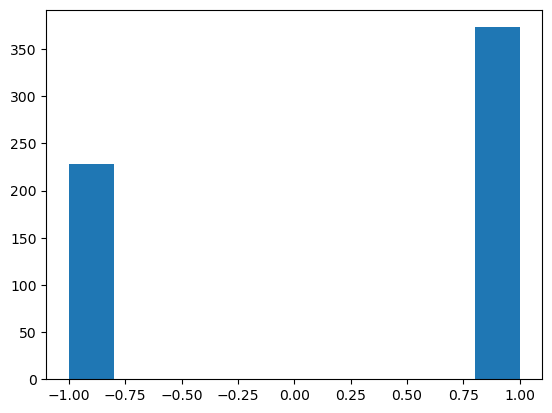

Class Counts:
2-Class
 1    373
-1    228
Name: count, dtype: int64

Class Ratio (Proportion):
2-Class
 1    0.620632
-1    0.379368
Name: count, dtype: float64


In [29]:
plt.hist(complete_data['2-Class'])
plt.show()

class_counts = complete_data['2-Class'].value_counts()
class_ratio = class_counts / len(complete_data)
print("Class Counts:")
print(class_counts)
print("\nClass Ratio (Proportion):")
print(class_ratio)

Alternative 2 class:
    Toxic: <= 1 mg/L
    Non-toxic: >1 mg/L

Let -1 = Non-toxic, 1 = Toxic


In [30]:
toxic_classes_2_2 = []

for i in complete_data['LC50']:
    if i <= 1:
        toxic_classes_2_2.append(1)
    else:
        toxic_classes_2_2.append(-1)

complete_data['2-Class-2'] = toxic_classes_2_2
complete_data.head()

SMILES   LC50  \
0                                           ClCl  0.120   
2                         CNC(=O)CS[P](=S)(OC)OC  1.650   
3             CCO[P](=S)(OCC)Oc1cc(C)nc(n1)C(C)C  0.001   
4  ClC1=C(Cl)C2(Cl)C3CO[S](=O)OCC3C1(Cl)C2(Cl)Cl  0.328   
6             CO[P](=S)(OC)SCN1C(=O)c2ccccc2C1=O  0.392   

                                       Structure  4-Class  3-Class  2-Class  \
0  <rdkit.Chem.rdchem.Mol object at 0x1784fb680>        3        1        1   
2  <rdkit.Chem.rdchem.Mol object at 0x1784fb610>        2        0        1   
3  <rdkit.Chem.rdchem.Mol object at 0x1784fb6f0>        3        1        1   
4  <rdkit.Chem.rdchem.Mol object at 0x1784fb840>        3        1        1   
6  <rdkit.Chem.rdchem.Mol object at 0x1784fb8b0>        3        1        1   

   2-Class-2  
0          1  
2         -1  
3          1  
4          1  
6          1

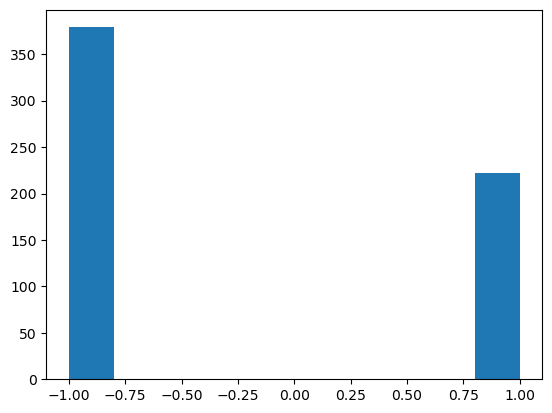

Class Counts:
2-Class-2
-1    379
 1    222
Name: count, dtype: int64

Class Ratio (Proportion):
2-Class-2
-1    0.630616
 1    0.369384
Name: count, dtype: float64


In [31]:
plt.hist(complete_data['2-Class-2'])
plt.show()

class_counts = complete_data['2-Class-2'].value_counts()
class_ratio = class_counts / len(complete_data)
print("Class Counts:")
print(class_counts)
print("\nClass Ratio (Proportion):")
print(class_ratio)

In [32]:
class_data = pd.DataFrame(
    {'4-Class':complete_data['4-Class'],
     '3-Class':complete_data['3-Class'],
     '2-Class':complete_data['2-Class'],
     '2-Class 2':complete_data['2-Class-2']}
)
class_data.to_csv('Data/class_data.csv', sep=',', index=False, encoding='utf-8')
class_data

4-Class  3-Class  2-Class  2-Class 2
0          3        1        1          1
2          2        0        1         -1
3          3        1        1          1
4          3        1        1          1
6          3        1        1          1
..       ...      ...      ...        ...
779        3        1        1          1
780        1       -1       -1         -1
781        3        1        1          1
782        1       -1       -1         -1
783        3        1        1          1

[601 rows x 4 columns]